In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
dus14 = pd.read_csv('NewData/DUS2014.csv')
dus18 = pd.read_csv('NewData/DUS2018.csv')

In [10]:
d14s = dus14[['lytis','amzius','issilavinimas','bdu_spalio','profesija']]

In [11]:
d18s = dus18[['lytis','amzius','issilavinimas','bdu_spalio','profesija']]

In [12]:
# suraskite ir išspausdinkite vidutinius vyrų bei moterų atlyginimus (spalio)
# 2014 ir 2018 metams.

x =d18s[d18s['lytis'] == 'M']
xvid = x['bdu_spalio'].mean()

y =d18s[d18s['lytis'] == 'F']
yvid = y['bdu_spalio'].mean()


print(f'Moteru vid atlyginimas 2018: {yvid}''\n' f'Vyru vid atlyginimas 2018: {xvid}')

Moteru vid atlyginimas 2018: 832.1469450889405
Vyru vid atlyginimas 2018: 1014.4962626801922


In [13]:
x =d14s[d14s['lytis'] == 'M']
xvid = x['bdu_spalio'].mean()

y =d14s[d14s['lytis'] == 'F']
yvid = y['bdu_spalio'].mean()

print(f'Moteru vid atlyginimas 2014: {yvid/3.45}''\n' f'Vyru vid atlyginimas 2014: {xvid/3.45}')

Moteru vid atlyginimas 2014: 607.9361328724889
Vyru vid atlyginimas 2014: 763.3894909890313


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
d14s['bdu_eur'] = d14s['bdu_spalio']/3.45
d14s.head()

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu_eur
0,M,20-29,G4,6.00,261,1.739130
1,F,20-29,G2,6.00,334,1.739130
2,F,40-49,G4,6.00,221,1.739130
3,F,30-39,G4,6.00,332,1.739130
4,M,40-49,G2,11.33,962,3.284058


In [15]:
d14s.query('lytis == "M"') # Paprastesnis negu x =d18s[d18s['lytis'] == 'M']

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu_eur
0,M,20-29,G4,6.00,261,1.739130
4,M,40-49,G2,11.33,962,3.284058
5,M,30-39,G2,6.00,122,1.739130
6,M,60+,G4,6.00,221,1.739130
8,M,20-29,G1,6.67,912,1.933333
...,...,...,...,...,...,...
44925,M,40-49,G4,7849.67,134,2275.266667
44927,M,30-39,G4,1793.00,231,519.710145
44931,M,50-59,G4,3246.00,232,940.869565
44934,M,60+,G4,3819.67,231,1107.150725


In [10]:
d14s.query('lytis == "M" and issilavinimas == "G3"') # su and

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu_eur
11,M,20-29,G3,9.67,315,2.802899
18,M,60+,G3,6.00,312,1.739130
19,M,20-29,G3,6.00,333,1.739130
21,M,20-29,G3,28.67,241,8.310145
25,M,50-59,G3,6.00,261,1.739130
...,...,...,...,...,...,...
44805,M,40-49,G3,3685.00,233,1068.115942
44808,M,60+,G3,2692.00,235,780.289855
44843,M,20-29,G3,1625.00,235,471.014493
44914,M,40-49,G3,3444.33,234,998.356522


In [11]:
edu = input('Iveskite issilavinimo koda')
ats = d14s.query('issilavinimas == @edu') # su @ pridedam kintamaji @edu
ats.head()

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu_eur
10,F,40-49,G3,10.00,334,2.898551
11,M,20-29,G3,9.67,315,2.802899
13,F,20-29,G3,9.00,332,2.608696
16,F,30-39,G3,6.00,241,1.739130
18,M,60+,G3,6.00,312,1.739130


In [12]:
# parašykite for ciklą, kuris išspausdintų išsilavinimo kodą ir vidutinį atlyginimą
# respondentų su tuo išsilavinimo kodu.
# naudokite .query() metodą
edus = ['G1', 'G2', 'G3', 'G4']


g1_issilavinimas = d14s.query('issilavinimas == "G1"')
for kodas in edus:
    vidurkis = d14s.query('issilavinimas == @kodas')['bdu_eur'].mean()
    print(kodas, vidurkis)

G1 475.12995000168917
G2 544.3340013705011
G3 731.0034754998917
G4 1012.7867025482703


In [13]:
def ltlToEuro(litas):
    euras = litas/3.45280
    return euras

d14s['Eurai iš funkcijos'] = d14s['bdu_spalio'].apply(ltlToEuro)

d14s.head()

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu_eur,Eurai iš funkcijos
0,M,20-29,G4,6.00,261,1.739130,1.737720
1,F,20-29,G2,6.00,334,1.739130,1.737720
2,F,40-49,G4,6.00,221,1.739130,1.737720
3,F,30-39,G4,6.00,332,1.739130,1.737720
4,M,40-49,G2,11.33,962,3.284058,3.281395


In [14]:
# parašykite kodą, kuris pridėtų naują stulpelį prie d14s lentelės
#  kur būtų tokie žodžiai:
# Vyras, jei stulpelyje lytis buvo M raidė
# Moteris, jei stulpelyje lytis buvo F raidė


def LTlytis(lytis):
    if lytis == "M":
        return "Vyras"
    else:
        return "Moteris"
d14s["Lytis Lietuviskai"] = d14s["lytis"].apply(LTlytis)  
d14s.head(6)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu_eur,Eurai iš funkcijos,Lytis Lietuviskai
0,M,20-29,G4,6.00,261,1.739130,1.737720,Vyras
1,F,20-29,G2,6.00,334,1.739130,1.737720,Moteris
2,F,40-49,G4,6.00,221,1.739130,1.737720,Moteris
3,F,30-39,G4,6.00,332,1.739130,1.737720,Moteris
4,M,40-49,G2,11.33,962,3.284058,3.281395,Vyras
5,M,30-39,G2,6.00,122,1.739130,1.737720,Vyras


In [15]:
# parašykite kodą, kuris pridėtų naują stulpelį prie d14s lentelės
#  kur būtų tokie žodžiai:
# Vyras, jei stulpelyje lytis buvo M raidė
# Moteris, jei stulpelyje lytis buvo F raidė


def zodzioKeitimas():
    lytys = []
    for x in dus14['lytis'].values:
        if x == 'M':
            lytys.append('Vyras')
        else:
            lytys.append('Moteris')
    return lytys

zodzioKeitimas()

d14s['Vyrai ir Moterys'] = zodzioKeitimas()
d14s.head(15)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu_eur,Eurai iš funkcijos,Lytis Lietuviskai,Vyrai ir Moterys
0,M,20-29,G4,6.00,261,1.739130,1.737720,Vyras,Vyras
1,F,20-29,G2,6.00,334,1.739130,1.737720,Moteris,Moteris
2,F,40-49,G4,6.00,221,1.739130,1.737720,Moteris,Moteris
3,F,30-39,G4,6.00,332,1.739130,1.737720,Moteris,Moteris
4,M,40-49,G2,11.33,962,3.284058,3.281395,Vyras,Vyras
5,M,30-39,G2,6.00,122,1.739130,1.737720,Vyras,Vyras
6,M,60+,G4,6.00,221,1.739130,1.737720,Vyras,Vyras
7,F,20-29,G2,13.33,531,3.863768,3.860635,Moteris,Moteris
8,M,20-29,G1,6.67,912,1.933333,1.931766,Vyras,Vyras
9,M,40-49,G2,6.00,332,1.739130,1.737720,Vyras,Vyras


In [16]:
# # nypd = pd.read_csv('NewData/NYPD_Shooting.csv', sep=';')
nypd = pd.read_csv('NewData/NYPD_Shooting.csv', sep=';', parse_dates={'DATA':['OCCUR_DATE', 'OCCUR_TIME']})
nypd.head(3)

,DATA,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,2019-08-23 22:10:00,201575314,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141
1,2019-11-27 15:54:00,205748546,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571
2,2019-02-02 19:40:00,193118596,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,40.791916,-73.945480


In [17]:
# .dt modulis, veikia tik tada, jei
#  stulpelis DataFrame yra datetime 
nypd_small = nypd[['DATA','BORO', 'STATISTICAL_MURDER_FLAG']]
nypd_small.head(5)



,DATA,BORO,STATISTICAL_MURDER_FLAG
0,2019-08-23 22:10:00,QUEENS,False
1,2019-11-27 15:54:00,BRONX,False
2,2019-02-02 19:40:00,MANHATTAN,False
3,2019-10-24 00:52:00,STATEN ISLAND,True
4,2019-08-22 18:03:00,BRONX,False


In [18]:
nypd_small['MonthNr'] = nypd_small['DATA'].dt.month
nypd_small['Hour'] = nypd_small['DATA'].dt.hour
nypd_small['HR'] = nypd_small['DATA'].dt.round('H').dt.hour # suapvalino valandas
nypd_small['MthhName'] = nypd_small['DATA'].dt.month_name()
nypd_small.head(3)

,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNr,Hour,HR,MthhName
0,2019-08-23 22:10:00,QUEENS,False,8,22,22,August
1,2019-11-27 15:54:00,BRONX,False,11,15,16,November
2,2019-02-02 19:40:00,MANHATTAN,False,2,19,20,February


In [19]:
# sukurkite du naujus stulpelius
# viename turi būti paros laikas ('Rytas, Vakaras, etc)
# kitame metų laikas (žiema, vasara, etc)
# naudokite stulpelius Hour ir MonthNr



def para(x):
    if x >= 22 or x < 6:
        return 'Naktis'
    elif x >= 6 and x < 10:
        return 'Rytas'
    elif x >= 10 and x < 16:
        return 'Diena'
    else:
        return 'Vakaras'

def metai(x):
    if x in [12,1,2]:
        return 'Žiema'
    elif x in [3,4,5]:
        return 'Pavasaris'
    elif x in [6,7,8]:
        return 'Vasara'
    else:
        return 'Ruduo'

nypd_small['ParosL'] = nypd_small['Hour'].apply(para)
nypd_small['MetųL'] = nypd_small['MonthNr'].apply(metai)
nypd_small.head(10)

,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNr,Hour,HR,MthhName,ParosL,MetųL
0,2019-08-23 22:10:00,QUEENS,False,8,22,22,August,Naktis,Vasara
1,2019-11-27 15:54:00,BRONX,False,11,15,16,November,Diena,Ruduo
2,2019-02-02 19:40:00,MANHATTAN,False,2,19,20,February,Vakaras,Žiema
3,2019-10-24 00:52:00,STATEN ISLAND,True,10,0,1,October,Naktis,Ruduo
4,2019-08-22 18:03:00,BRONX,False,8,18,18,August,Vakaras,Vasara
5,2019-06-07 17:50:00,BROOKLYN,False,6,17,18,June,Vakaras,Vasara
6,2019-03-11 16:30:00,BROOKLYN,False,3,16,16,March,Vakaras,Pavasaris
7,2019-10-03 01:45:00,BROOKLYN,True,10,1,2,October,Naktis,Ruduo
8,2019-02-17 03:00:00,QUEENS,False,2,3,3,February,Naktis,Žiema
9,2019-07-10 02:56:00,BROOKLYN,False,7,2,3,July,Naktis,Vasara


In [20]:
nypd_small['MthhName'].value_counts().sort_values(ascending=True) # MonthNr - indeks, value_counts - values

MthhName
February     1098
March        1331
January      1411
November     1550
April        1578
December     1601
October      1851
September    2033
May          2037
June         2192
August       2462
July         2482
Name: count, dtype: int64

In [21]:
shootings = nypd_small['MthhName'].value_counts()
months = shootings.index
counts = shootings.values
print(months, counts, sep='\n')

Index(['July', 'August', 'June', 'May', 'September', 'October', 'December',
       'April', 'November', 'January', 'March', 'February'],
      dtype='object', name='MthhName')
[2482 2462 2192 2037 2033 1851 1601 1578 1550 1411 1331 1098]


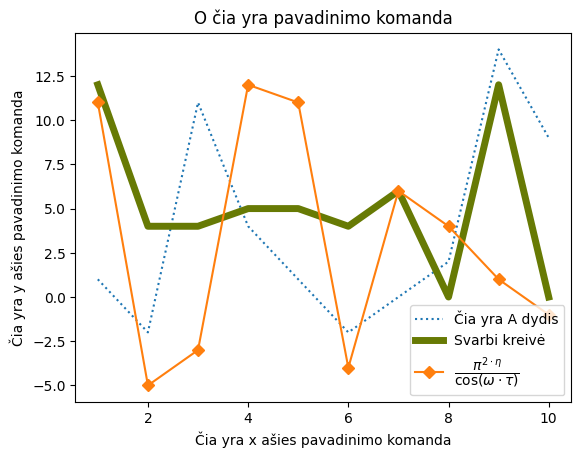

In [22]:
# https://matplotlib.org/stable/api/markers_api.html
# https://xkcd.com/color/rgb/

# plt.subplots():
a = np.arange(1,11)
b = np.random.randint(-5, 15, 10)
c = np.random.randint(-5, 15, 10)
d = np.random.randint(-5, 15, 10)
langas, grafikas = plt.subplots()
# .plot() metodas:
grafikas.plot(a,b, label="Čia yra A dydis", linestyle=":")
grafikas.plot(a,c, label="Svarbi kreivė", linewidth=5, color='xkcd:olive green')
grafikas.plot(a,d, label=r'$\dfrac{\pi^{2\cdot \eta}}{\cos(\omega\cdot\tau)}$', marker='D')

grafikas.set_xlabel("Čia yra x ašies pavadinimo komanda")
grafikas.set_ylabel("Čia yra y ašies pavadinimo komanda")
grafikas.set_title("O čia yra pavadinimo komanda")
grafikas.legend(loc="best")

plt.show()

In [23]:
nypd_small['MthhName'].value_counts().sort_index(ascending=True)

MthhName
April        1578
August       2462
December     1601
February     1098
January      1411
July         2482
June         2192
March        1331
May          2037
November     1550
October      1851
September    2033
Name: count, dtype: int64

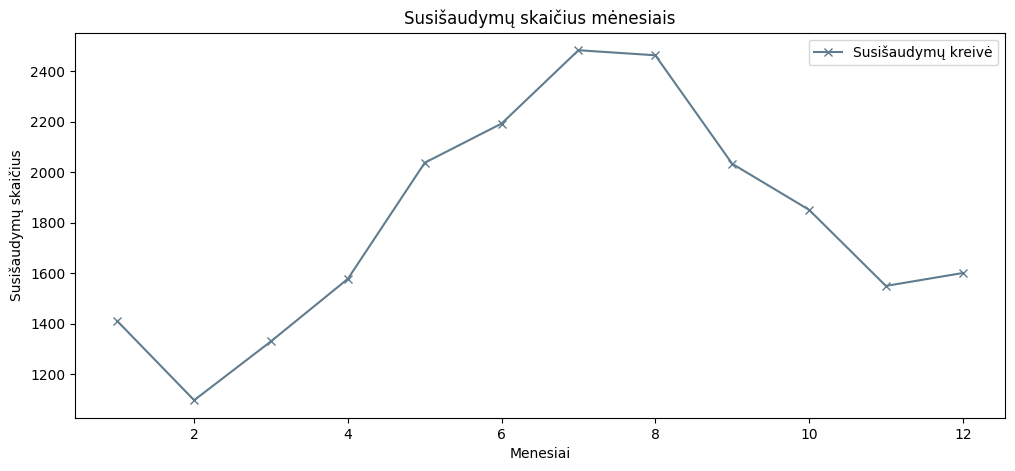

In [24]:
# turite nypd susišaudymų duomenis.
# nubraižykite vizualizaciją, naudodami ką tik pateiktą pavyzdį, 
# kad matytumėme, kurį monėsį yra daugiausiai, mažiausiai užfiksduotų
# susišaudymų
# sudėkite prasmingus ašių pavadinimus

months = nypd_small['MonthNr'].value_counts().sort_index(ascending=True).index
shootings = nypd_small['MonthNr'].value_counts().sort_index(ascending=True).values



langas, grafikas = plt.subplots(figsize=[12,5])

grafikas.plot(months, shootings,  label = 'Susišaudymų kreivė', marker = 'x', color='xkcd:blue grey')

grafikas.set_xlabel('Menesiai')
grafikas.set_ylabel('Susišaudymų skaičius')
grafikas.set_title("Susišaudymų skaičius mėnesiais")

grafikas.legend(loc='best')


plt.show()

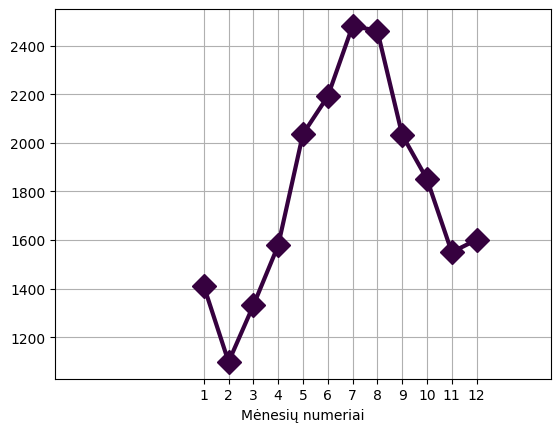

In [25]:
monts_counts = nypd_small['MonthNr'].value_counts().sort_index(ascending=True)
months = monts_counts.index
counts = monts_counts.values

fig, ax = plt.subplots()
ax.plot(months, counts, lw=3, c='xkcd:deep purple', marker='D', ms=12)

ax.set_xticks(months) #x ašies norimų skaičių palikimas
ax.set_xlim(-5, 15) #x ašies ribų keitimas
ax.grid() #tinklelio uždėjimas
ax.set_xlabel('Mėnesių numeriai')

plt.show()

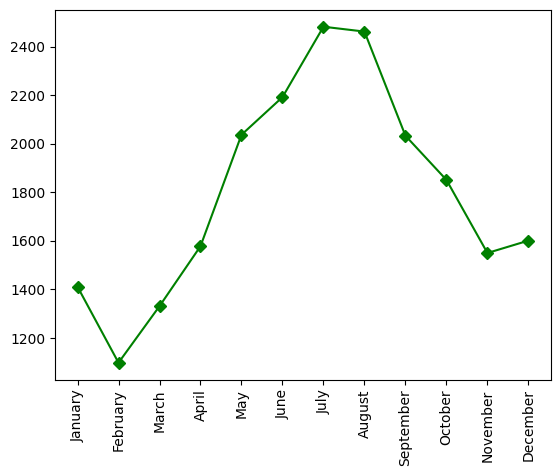

In [29]:
months = nypd_small[['MthhName', 'MonthNr']].value_counts().reset_index().sort_values(by='MonthNr')
fig, ax = plt.subplots()

mnames = months['MthhName'].values
mnumbers = months['MonthNr']
counts = months['count'].values

ax.plot(mnumbers, counts, marker='D', c='green')
ax.set_xticks(mnumbers)
ax.set_xticklabels(mnames, rotation=90)

plt.show()

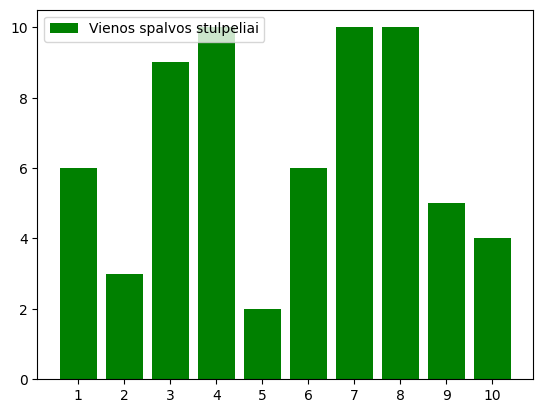

In [48]:
# bar grafikai:
a = np.arange(1,11)
b = np.random.randint(1,11,10)
color_list = ['green', 'red', 'blue', 'xkcd:deep purple']

fig, ax = plt.subplots()

ax.bar(a, b, color='green', label="Vienos spalvos stulpeliai")
ax.set_xticks(a)
ax.legend(loc='best')
plt.show()

In [ ]:
# :imp -importavimui
# :sfig - vienam grafikui
# :fig - 1nm grafikui su daugiau kodo